This notebook...

In [1]:
import pandas as pd
import numpy as np

# For data viz
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# File system manangement
import os

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100

# pd.set_option('plotting.backend', 'plotly')
pd.set_option("display.min_rows", 10)
pd.set_option("display.max_columns", 50)
pd.set_option("max_colwidth", 100)

In [2]:
path = './application_train.csv'

df = pd.read_csv(path)

# Model interpretation

## Random Forest

In [3]:
import shap
import pickle, sys
from preprocess_utils import sample_data

In [4]:
print(sys.version)

3.8.10 | packaged by conda-forge | (default, May 11 2021, 06:25:23) [MSC v.1916 64 bit (AMD64)]


In [5]:
best_model = pickle.load(open('rf_best', 'rb'))
y_test_rf = pickle.load(open('y_test_rf', 'rb'))
X_test_rf = pickle.load(open('X_test_rf', 'rb'))

In [10]:
sample_test, _ = sample_data(X_test_rf, y_test_rf, nb_samples=1000)
explainer = shap.TreeExplainer(best_model)

(1000, 122)
(1000,)
0    0.919
1    0.081
Name: TARGET, dtype: float64


In [11]:
shap_values = explainer.shap_values(sample_test)

### Global interpretation

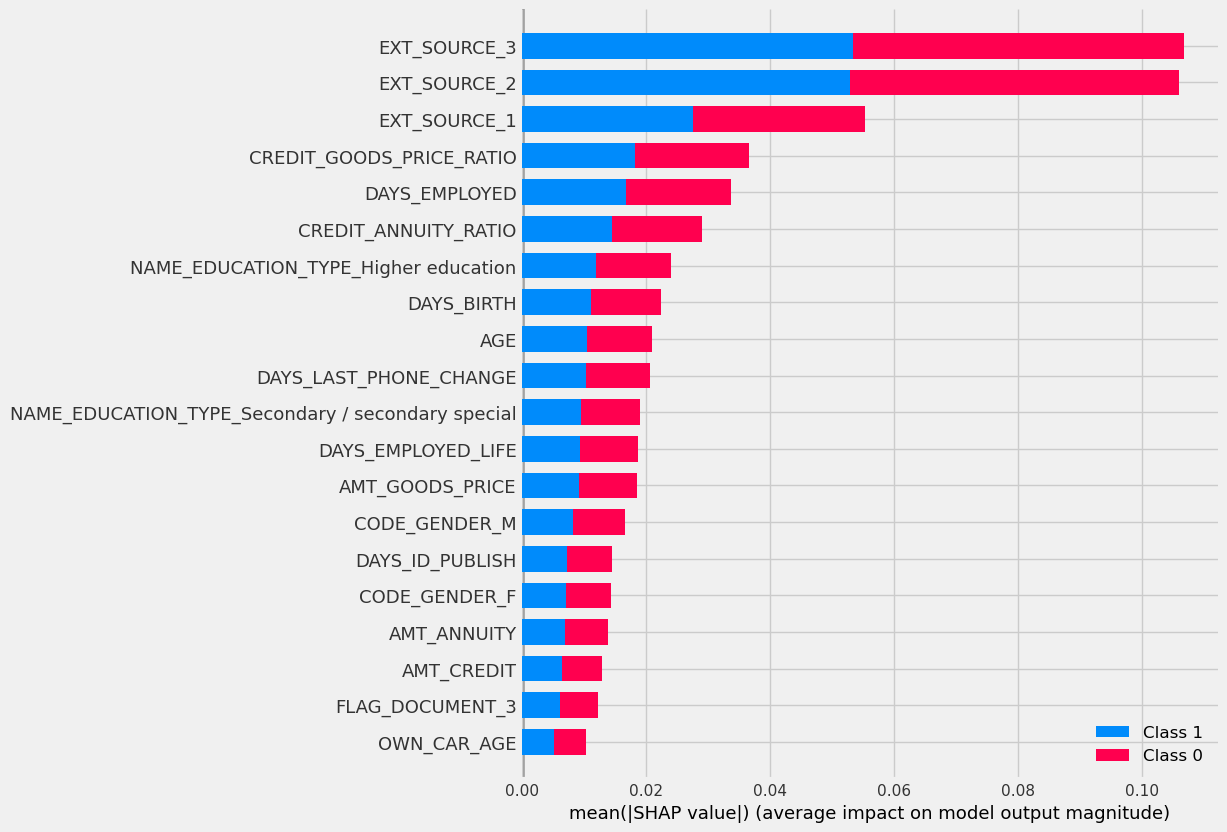

In [12]:
shap.summary_plot(shap_values, sample_test)

### Local interpretation

In [13]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0], feature_names=sample_test.columns)

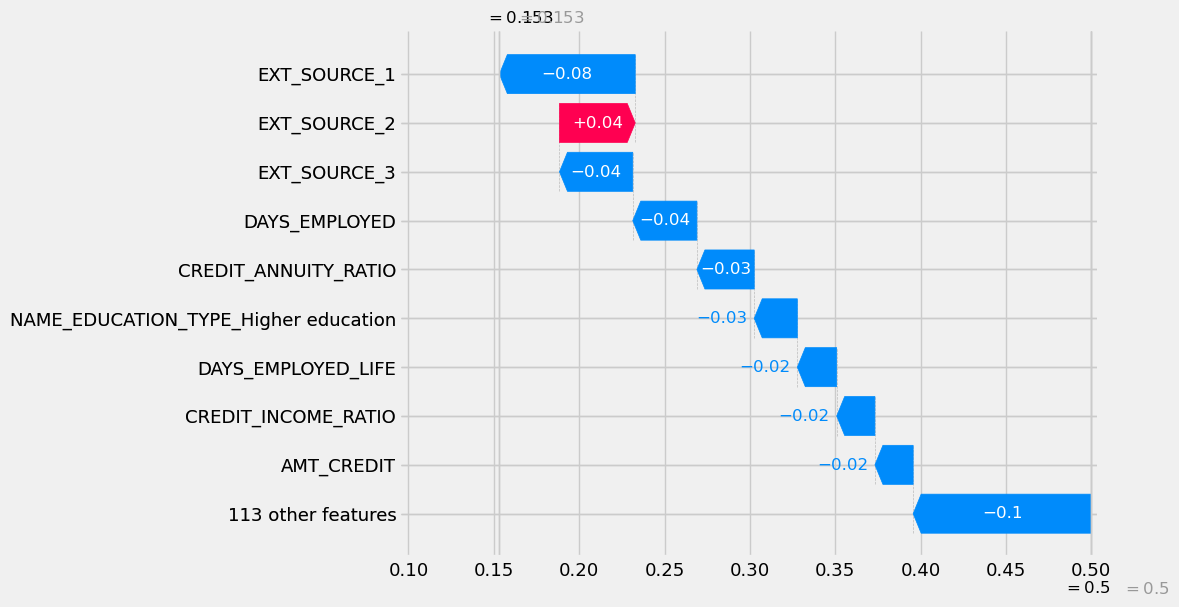

In [14]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[1], shap_values[1][0], feature_names=sample_test.columns)

In [15]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][0:1000], feature_names=sample_test.columns)

## LGBM

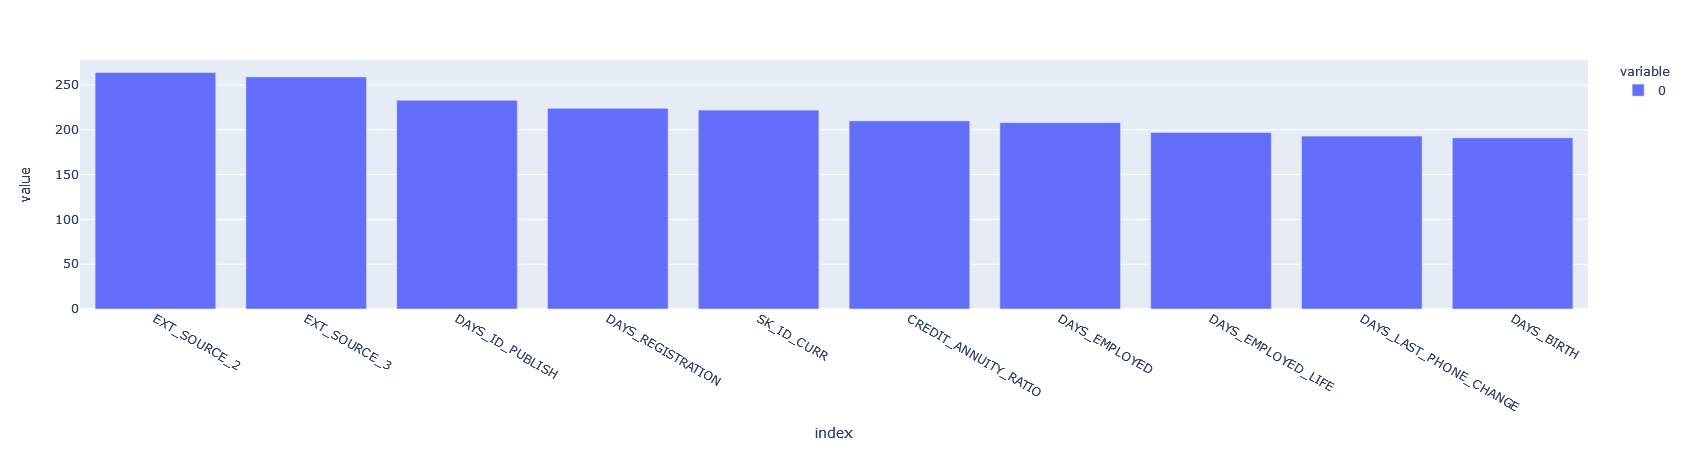

In [80]:
features_imp = pd.Series(best_model.feature_importances_, index = X_train_s2.columns).sort_values(ascending=False)
px.bar(features_imp.head(10))

- SK_ID_CURR --> ID of the loan
- DAYS_ID_PUBLISH --> When was the last time the client change identity (measured in days before the application)
- DAYS_REGISTRATION --> How many days before the application did client change his registration

# Notes

- Voir OLS Sklearn
- Voir GLM Statquest
- Continuer à écrire logistic regression (voir sources)
    - Lire article medium: https://medium.com/data-science-group-iitr/logistic-regression-simplified-9b4efe801389
    - Voir odds statquest
    - 
- Ranger notebook
- 